In [17]:
# Connected libraries
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
df_gamers = pd.read_csv('online_gaming_behavior_dataset.csv')
print(df_gamers.info())
print(df_gamers.head(5))
print(df_gamers.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [19]:
# Preparing data
data = df_gamers
data[['Gender', 'Location', 'GameGenre', 'GameDifficulty']] = data[['Gender', 'Location', 'GameGenre', 'GameDifficulty']].apply(lambda x: pd.factorize(x)[0])

labels = pd.Categorical(df_gamers['EngagementLevel'], categories=['Low', 'Medium', 'High'])
labels = pd.factorize(labels, sort=True)[0]

#labels = pd.factorize(df_gamers['EngagementLevel'], sort=True)[0]
data = data.drop(['PlayerID', 'EngagementLevel'], axis=1)
#print(labels)

In [13]:
data_test = data
#data_test['EngagementLevel'] = pd.factorize(df_gamers['EngagementLevel'])[0]
#print(data_test.head(20))
data_test['EngagementLevel'] = pd.Categorical(df_gamers['EngagementLevel'], categories=['Low', 'Medium', 'High'])
data_test['EngagementLevel'] = pd.factorize(data_test['EngagementLevel'], sort=True)[0]
#print(data_test.head(20))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

Test Set Accuracy : 90.1835893593106 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2057
           1       0.90      0.94      0.92      3890
           2       0.91      0.87      0.89      2060

    accuracy                           0.90      8007
   macro avg       0.90      0.89      0.90      8007
weighted avg       0.90      0.90      0.90      8007



<Axes: >

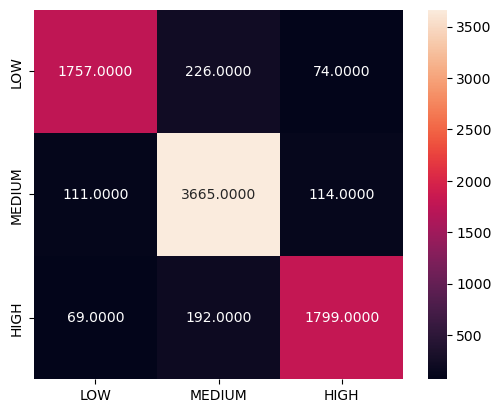

In [21]:
# Training a model
bst = XGBClassifier(n_estimators=150, max_depth=2, learning_rate=1, objective='multi:softprob')
bst.fit(X_train._get_numeric_data(), y_train)

test_pred = bst.predict(X_test)

print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(y_test, test_pred)}")
sns.heatmap(confusion_matrix(y_test, test_pred), xticklabels=['LOW', 'MEDIUM', 'HIGH'], yticklabels=['LOW', 'MEDIUM', 'HIGH'],
      annot=True, fmt='.4f', square=True)

In [127]:
test_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [126]:
#data = data.drop(['Gender'], axis=1)
data = data[:10]